In [98]:
# importing the libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [99]:
#read the file
df = pd.read_csv("garments_worker_productivity.csv")

In [100]:
#check for the null values
df[df.isnull().any(axis=1)]

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
6,1/1/2015,Quarter1,finishing,Thursday,2,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.755167
13,1/1/2015,Quarter1,finishing,Thursday,10,0.65,3.94,NaN,960,0,0.0,0,0,8.0,0.705917
14,1/1/2015,Quarter1,finishing,Thursday,8,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.676667
15,1/1/2015,Quarter1,finishing,Thursday,4,0.75,3.94,NaN,2160,0,0.0,0,0,18.0,0.593056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889


In [101]:
#fill null values with 0 
df = df.fillna(0)

In [102]:
df[df.isnull().any(axis=1)]

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity


In [103]:
#check for outliers and removing the outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1


In [104]:
lower_limit = Q1 - (1.5*IQR)
upper_limit = Q3 + (1.5*IQR)

In [105]:
df = df[~((df < lower_limit) | (df > upper_limit)).any(axis=1)]

/Users/harishmateti/opt/anaconda3/envs/New_User/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  """Entry point for launching an IPython kernel.


In [106]:
df

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,0.0,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,0.0,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,0.0,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,0.0,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,0.0,1800,0,0.0,0,0,15.0,0.505889


In [107]:
df.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.0,936.0,936.0,936.000000,936.000000
mean,6.476496,0.756731,13.686357,541.611111,4535.534188,27.224359,0.0,0.0,0.0,31.975962,0.774587
std,3.565654,0.055477,10.608452,574.037920,3432.259399,31.943950,0.0,0.0,0.0,22.134765,0.142845
min,1.000000,0.600000,2.900000,0.000000,0.000000,0.000000,0.0,0.0,0.0,2.000000,0.350417
25%,3.000000,0.700000,3.940000,0.000000,1440.000000,0.000000,0.0,0.0,0.0,8.000000,0.700181
50%,6.500000,0.800000,11.410000,386.000000,3750.000000,0.000000,0.0,0.0,0.0,31.500000,0.800155
75%,10.000000,0.800000,22.520000,1083.000000,6960.000000,50.000000,0.0,0.0,0.0,57.000000,0.860441
max,12.000000,0.800000,54.560000,1871.000000,15120.000000,119.000000,0.0,0.0,0.0,89.000000,1.120437


In [108]:
df['quarter'] = df['quarter'].astype('category')
df['quarter'] = df['quarter'].cat.codes

df['department'] = df['department'].astype('category')
df['department'] = df['department'].cat.codes

df['day'] = df['day'].astype('category')
df['day'] = df['day'].cat.codes

df['date'] = df['date'].astype('category')
df['date'] = df['date'].cat.codes

# 1) linear regression using statsmodels
#considering x and y variables as independent and dependent variables



In [109]:
y = df['actual_productivity']
X = df.drop('actual_productivity',axis=1)
X

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers
0,0,0,2,3,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0
1,0,0,1,3,1,0.75,3.94,0.0,960,0,0.0,0,0,8.0
2,0,0,2,3,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5
3,0,0,2,3,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5
4,0,0,2,3,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,51,1,0,5,10,0.75,2.90,0.0,960,0,0.0,0,0,8.0
1193,51,1,0,5,8,0.70,3.90,0.0,960,0,0.0,0,0,8.0
1194,51,1,0,5,7,0.65,3.90,0.0,960,0,0.0,0,0,8.0
1195,51,1,0,5,9,0.75,2.90,0.0,1800,0,0.0,0,0,15.0


In [110]:
X = sm.add_constant(X) # Add constant for the first value (intercept)
model = sm.OLS(endog= y, exog = X)
results = model.fit()
print(results.summary())

                             OLS Regression Results                            
Dep. Variable:     actual_productivity   R-squared:                       0.275
Model:                             OLS   Adj. R-squared:                  0.267
Method:                  Least Squares   F-statistic:                     31.89
Date:                 Tue, 13 Sep 2022   Prob (F-statistic):           1.61e-57
Time:                         17:29:25   Log-Likelihood:                 644.42
No. Observations:                  936   AIC:                            -1265.
Df Residuals:                      924   BIC:                            -1207.
Df Model:                           11                                         
Covariance Type:             nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const               

/Users/harishmateti/opt/anaconda3/envs/New_User/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1918: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


# Conclusion regarding the features from the linear regression results is not a good fit, since the r squared value is less than 0.5

# Question 2
# the  p>|t| values less than 0.05 are considered as the best features 

In [111]:
best_features = df[['team','targeted_productivity','smv','incentive']]
best_features

,team,targeted_productivity,smv,incentive
0,8,0.80,26.16,98
1,1,0.75,3.94,0
2,11,0.80,11.41,50
3,12,0.80,11.41,50
4,6,0.80,25.90,50
...,...,...,...,...
1192,10,0.75,2.90,0
1193,8,0.70,3.90,0
1194,7,0.65,3.90,0
1195,9,0.75,2.90,0


# Question 3
# comparing OLS and SGD implementation of linear model.

In [148]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 42)

In [149]:
reg = make_pipeline(StandardScaler(), SGDRegressor(max_iter=1000, tol=1e-3))
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

In [153]:
val_error = mean_squared_error(y_test, y_pred)

y_train_pred = reg.predict(X_train)
train_error = mean_squared_error(y_train, y_train_pred)

# Get validation scores
scores = cross_validate(reg, X_train, y_train, cv=3)

print("Training MSE: ", train_error)
print("Validation MSE: ", np.mean(scores['test_score']))

score = reg.score(X_test, y_test)
print("R-squared:", score)

Training MSE:  0.014967833975445308
Validation MSE:  0.25055659637287825
R-squared: 0.1886598858898505


# The r_squared value for linear regression is "0.275" and the r-squared value for the SGD is "0.188"

# Question 4
# Developing a polynomial regression model with stochastic gradient descent.
 

# With learning rate (alpha) = 0.0001

In [159]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 100)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size = .3, random_state = 50)

In [164]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.fit_transform(X_test)
X_val_poly = poly_features.fit_transform(X_val)


sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, alpha = 0.0001, random_state= 100)
sgd_reg.fit(X_train_poly, y_train.ravel())
poly_train_pred = sgd_reg.predict(X_train_poly)
poly_test_pred = sgd_reg.predict(X_test_poly)
poly_val_pred = sgd_reg.predict(X_val_poly)

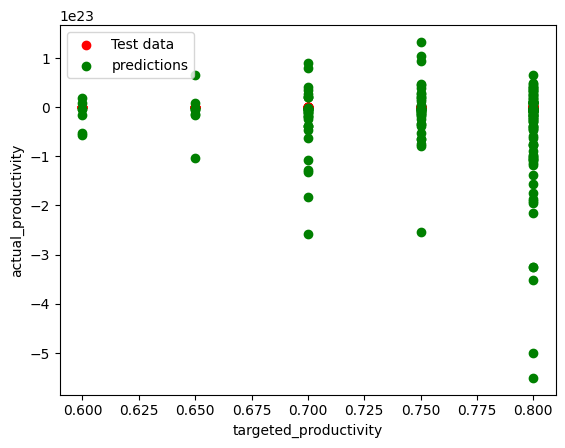

In [165]:
plt.scatter(X_test['targeted_productivity'], y_test, color = "red", label = "Test data")
plt.scatter(X_test['targeted_productivity'], poly_test_pred, color = "green", label = "predictions")
plt.xlabel("targeted_productivity")
plt.ylabel("actual_productivity")
plt.legend()
plt.show()


In [166]:
val_error = mean_squared_error(y_val, poly_val_pred)
train_error = mean_squared_error(y_train, poly_train_pred)

print("Training MSE: ", train_error)
print("Validation MSE: ", val_error)

score = sgd_reg.score(X_train_poly, y_train)
print("R-squared:", score)

Training MSE:  5.6953461519969116e+45
Validation MSE:  4.838091091477476e+45
R-squared: -2.7805280210787056e+47


# With learning rate (alpha) = 0.001

In [167]:

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, alpha = 0.001, random_state= 100)
sgd_reg.fit(X_train_poly, y_train.ravel())
poly_train_pred = sgd_reg.predict(X_train_poly)
poly_test_pred = sgd_reg.predict(X_test_poly)
poly_val_pred = sgd_reg.predict(X_val_poly)

In [168]:
val_error = mean_squared_error(y_val, poly_val_pred)
train_error = mean_squared_error(y_train, poly_train_pred)

print("Training MSE: ", train_error)
print("Validation MSE: ", val_error)

score = sgd_reg.score(X_train_poly, y_train)
print("R-squared:", score)

Training MSE:  2.653292579554111e+48
Validation MSE:  2.6732504025371926e+48
R-squared: -1.2953654033800345e+50


# With learning rate (alpha) = 0.01

In [173]:

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, alpha = 0.01, random_state= 100)
sgd_reg.fit(X_train_poly, y_train.ravel())
poly_train_pred = sgd_reg.predict(X_train_poly)
poly_test_pred = sgd_reg.predict(X_test_poly)
poly_val_pred = sgd_reg.predict(X_val_poly)

In [174]:
val_error = mean_squared_error(y_val, poly_val_pred)
train_error = mean_squared_error(y_train, poly_train_pred)

print("Training MSE: ", train_error)
print("Validation MSE: ", val_error)

score = sgd_reg.score(X_train_poly, y_train)
print("R-squared:", score)

Training MSE:  2.2202269347573477e+48
Validation MSE:  2.2266737121797323e+48
R-squared: -1.0839381910232024e+50


# With learning rate (alpha) = 0.1

In [175]:

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, alpha = 0.1, random_state= 100)
sgd_reg.fit(X_train_poly, y_train.ravel())
poly_train_pred = sgd_reg.predict(X_train_poly)
poly_test_pred = sgd_reg.predict(X_test_poly)
poly_val_pred = sgd_reg.predict(X_val_poly)

In [176]:
val_error = mean_squared_error(y_val, poly_val_pred)
train_error = mean_squared_error(y_train, poly_train_pred)

print("Training MSE: ", train_error)
print("Validation MSE: ", val_error)

score = sgd_reg.score(X_train_poly, y_train)
print("R-squared:", score)

Training MSE:  2.642806721886207e+48
Validation MSE:  2.669722995152896e+48
R-squared: -1.2902460971442885e+50


# With learning rate (alpha) = 1

In [177]:
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, alpha = 1, random_state= 100)
sgd_reg.fit(X_train_poly, y_train.ravel())
poly_train_pred = sgd_reg.predict(X_train_poly)
poly_test_pred = sgd_reg.predict(X_test_poly)
poly_val_pred = sgd_reg.predict(X_val_poly)

In [178]:
val_error = mean_squared_error(y_val, poly_val_pred)
train_error = mean_squared_error(y_train, poly_train_pred)

print("Training MSE: ", train_error)
print("Validation MSE: ", val_error)

score = sgd_reg.score(X_train_poly, y_train)
print("R-squared:", score)

Training MSE:  2.642806721886207e+48
Validation MSE:  2.669722995152896e+48
R-squared: -1.2902460971442885e+50


# The best learning rate for polynomial regression is "0.01"

# Question 5
# Lasso regression model

In [143]:
lasso = make_pipeline(StandardScaler(), SGDRegressor(alpha=0.0001, epsilon=0.01, eta0=0.1, penalty="l1", max_iter=1000, tol=1e-3, random_state=42))
lasso.fit(X_train, y_train)
lasso_train_pred = lasso.predict(X_train)
lasso_test_pred = lasso.predict(X_test)
lasso_val_pred = lasso.predict(X_val)

val_error = mean_squared_error(y_val, lasso_val_pred)
train_error = mean_squared_error(y_train, lasso_train_pred)

# Get validation scores
scores = cross_validate(lasso, X_train, y_train, cv=3)

print("Training MSE: ", train_error)
print("Validation MSE: ", np.mean(scores['test_score']))

score = lasso.score(X_test, y_test)
print("R-squared:", score)

Training MSE:  0.01690076351278174
Validation MSE:  0.2224122680381149
R-squared: 0.10544951259812152


In [142]:
elasticnet = make_pipeline(StandardScaler(), SGDRegressor(early_stopping = True, penalty="elasticnet", max_iter=1000, tol=1e-3, random_state=42))
elasticnet.fit(X_train, y_train)
elasticnet_train_pred = elasticnet.predict(X_train)
elasticnet_test_pred = elasticnet.predict(X_test)
elasticnet_val_pred = elasticnet.predict(X_val)

val_error = mean_squared_error(y_val, elasticnet_val_pred)
train_error = mean_squared_error(y_train, elasticnet_train_pred)

# Get validation scores
scores = cross_validate(elasticnet, X_train, y_train, cv=3)

print("Training MSE: ", train_error)
print("Validation MSE: ", np.mean(scores['test_score']))

score = elasticnet.score(X_test, y_test)
print("R-squared:", score)

Training MSE:  0.014713855061647947
Validation MSE:  0.2559620869603321
R-squared: 0.2551735702866582


# Yes, the early stopping effects the models performance because the r squared values are different

# Question 6
# Ridge regression model


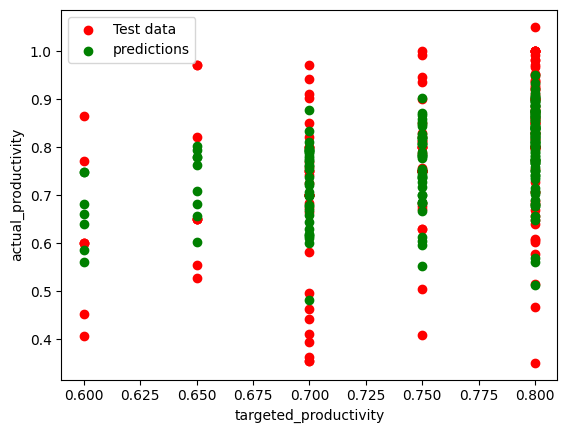

In [185]:
ridge = make_pipeline(StandardScaler(), SGDRegressor(alpha=0.0001, epsilon=0.01, eta0=0.1, penalty="l2", max_iter=1000, tol=1e-3, random_state=1))
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)

plt.scatter(X_test['targeted_productivity'], y_test, color = "red", label = "Test data")
plt.scatter(X_test['targeted_productivity'], y_pred, color = "green", label = "predictions")
plt.xlabel("targeted_productivity")
plt.ylabel("actual_productivity")
plt.legend(loc="upper left")
plt.show()

In [186]:
ridge_train_pred = ridge.predict(X_train)
ridge_test_pred = ridge.predict(X_test)
ridge_val_pred = ridge.predict(X_val)

val_error = mean_squared_error(y_val, ridge_val_pred)
train_error = mean_squared_error(y_train, ridge_train_pred)

# Get validation scores
scores = cross_validate(ridge, X_train, y_train, cv=3)

print("Training MSE: ", train_error)
print("Validation MSE: ", np.mean(scores['test_score']))

score = ridge.score(X_test, y_test)
print("R-squared:", score)

Training MSE:  0.017147631720031944
Validation MSE:  0.19764895764928106
R-squared: 0.0671200804810903


In [189]:

parameters = {
    'alpha': 10.0 ** -np.arange(1, 7),
    'loss': ['squared_loss', 'huber', 'epsilon_insensitive'],
    'learning_rate': ['constant', 'optimal', 'invscaling'],
}
clf = GridSearchCV(estimator = SGD, param_grid = parameters, cv = 2, n_jobs=-1)

clf.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=SGDRegressor(penalty='elasticnet'), n_jobs=-1,
             param_grid={'alpha': array([1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06]),
                         'learning_rate': ['constant', 'optimal', 'invscaling'],
                         'loss': ['squared_loss', 'huber',
                                  'epsilon_insensitive']})

In [190]:
clf.best_params_

{'alpha': 0.1, 'learning_rate': 'optimal', 'loss': 'epsilon_insensitive'}

# In Ridge Regression model the best learning rate is "0.1" and type of learning rate is "Optimal" and loss funtion is "epsilon_insensitive"

# Question 7
# ElasticNet Regression model

In [136]:
elasticnet = make_pipeline(StandardScaler(), SGDRegressor(alpha=0.0001, epsilon=0.01, eta0=0.1, penalty="elasticnet", max_iter=1000, tol=1e-3, random_state=50))
elasticnet.fit(X_train, y_train)
elasticnet_train_pred = elasticnet.predict(X_train)
elasticnet_test_pred = elasticnet.predict(X_test)
elasticnet_val_pred = elasticnet.predict(X_val)

val_error = mean_squared_error(y_val, elasticnet_val_pred)
train_error = mean_squared_error(y_train, elasticnet_train_pred)

In [137]:
scores = cross_validate(elasticnet, X_train, y_train, cv=3)

print("Training MSE: ", train_error)
print("Validation MSE: ", np.mean(scores['test_score']))

score = elasticnet.score(X_test, y_test)
print("R-squared:", score)

Training MSE:  0.01512955731251917
Validation MSE:  0.2380572137040725
R-squared: 0.19457158925354545


In [138]:
SGD = SGDRegressor(penalty="elasticnet")

parameters = {
    'alpha': 10.0 ** -np.arange(1, 7),
    'loss': ['squared_loss', 'huber', 'epsilon_insensitive'],
    'learning_rate': ['constant', 'optimal', 'invscaling'],
}
clf = GridSearchCV(estimator = SGD, param_grid = parameters, cv = 2, n_jobs=-1)

clf.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=SGDRegressor(penalty='elasticnet'), n_jobs=-1,
             param_grid={'alpha': array([1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06]),
                         'learning_rate': ['constant', 'optimal', 'invscaling'],
                         'loss': ['squared_loss', 'huber',
                                  'epsilon_insensitive']})

In [139]:
clf.best_params_

{'alpha': 0.1, 'learning_rate': 'invscaling', 'loss': 'huber'}

# In ElasticNet Regression model the best learning rate is "0.1" and  type of  learning rate is "invscaling" and loss funtion is "huber"

In [179]:
#

# Question 8
 # The best among the 4 regressions is " Linear Regression"